#### Analysis of w+; UAS-ArcLight/ +; R20D01-Gal4/ VT50384-lexA, lexAop-TNT Flies (Block flies)

In [42]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

import octopus as oct

In [43]:
filenames =['R20D01-ArcLight_50384-TNT_SING002_2020-05-31_11.31VT50384lexA-TNT_Ftrace_mean',
            'R20D01-ArcLight_TNT_SING003_2020-05-29_12.25VT50384lexA-TNT_Ftrace_mean',
            'R20D01-ArcLight_50384-TNT003_2020-06-03_15.39VT50384lexA-TNT_Ftrace_mean',
            'R20D01-ArcLight_50384-TNT004_2020-06-03_16.37VT50384lexA-TNT_Ftrace_mean',
            'R20D01-ArcLight_50384-TNT007_2020-06-03_17.55VT50384lexA-TNT_Ftrace_mean',
            'R20D01-ArcLight-50384-TNT001_2020-06-04_12.27VT50384lexA-TNT_Ftrace_mean',
            'R20D01_ArcLight_50384_TNT004_2020-06-12_13.01VT50384lexA-TNT_Ftrace_mean',
            'R20D01-ArcLight_50384-TNT002_2020-06-03_15.22VT50384lexA-TNT_Ftrace_mean']

In [44]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

In [45]:
R20D01_TNT_Ctrl_Ftrace_all = np.load('R20D01_TNT_Ctrl_Ftrace_all.npy')
R20D01_TNT_Ctrl_Ftrace_mean = np.load('R20D01_TNT_Ctrl_Ftrace_mean.npy')
R20D01_TNT_Ctrl_MOI = np.load('R20D01_TNT_Ctrl_MOI.npy')
R20D01_TNT_Ctrl_LDir = np.load('R20D01_TNT_Ctrl_LDir.npy')

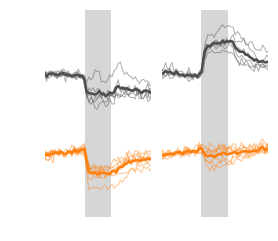

In [46]:
fig = plt.figure(figsize = (4, 3.8))

plt.subplots_adjust(wspace=0.1)

data = [R20D01_TNT_Ctrl_Ftrace_all, Ftrace_all]
colors = ['0.3', 'C1']
vsize = 0.14
alpha = 0.45

ax = fig.add_subplot(121)
plt.plot(time, data[0][:,6,:] + vsize*1.2, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,6,:], axis=1)+ vsize*1.2, colors[0], linewidth = 2.5)

plt.plot(time, data[1][:,6,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[1][:,6,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize,+vsize*2.2])
plt.axis('off') 


ax = fig.add_subplot(122)
plt.plot(time, data[0][:,2,:] + vsize*1.2, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,2,:], axis=1)+ vsize*1.2, colors[0], linewidth = 2.5)

plt.plot(time,data[1][:,2,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time,np.mean(data[1][:,2,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize,+vsize*2.2])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig2_R20D01_50384-TNT_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [47]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

In [48]:
R20D01_TNT_Ctrl_Ftrace_sem= stats.sem(R20D01_TNT_Ctrl_Ftrace_mean,1)

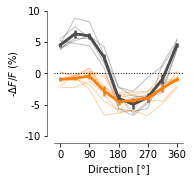

In [49]:
fig = plt.figure(figsize = (2.3, 2.3))


ax = fig.add_subplot(111) #PLOT directional tuning


ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(rotations, R20D01_TNT_Ctrl_Ftrace_mean, color='0.3', linewidth = 1, zorder = 0,alpha=0.35)
plt.plot(rotations, np.mean(R20D01_TNT_Ctrl_Ftrace_mean,1), linewidth = 2.5, color = '0.3')
plt.errorbar(rotations, np.mean(R20D01_TNT_Ctrl_Ftrace_mean,1), yerr = R20D01_TNT_Ctrl_Ftrace_sem, linewidth = 2.5, color = '0.3')

plt.plot(rotations, Ftrace_mean, color='C1', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C1')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C1')


plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel(u'Direction [°]', fontsize = 10)
ax.set_ylabel('-$\Delta F/F$ (%)', fontsize = 10)
yticks = np.array([-0.1,-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
plt.ylim([-0.10,0.10])

bbox_inches = 'tight'
#plt.savefig('Fig2_R20D01_50384-TNT_DirTuning.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [50]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [51]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.00803917582900421   D_deg = 90.0
H_magn =0.07294521753393832   H_deg = 42.29261401472497
MOI = 0.07416112486284958
D_magn =0.0027744241259376004   D_deg = 90.0
H_magn =0.05381209244554124   H_deg = 41.38781780366846
MOI = 0.03408745100222492
D_magn =0.007897472383180374   D_deg = 90.0
H_magn =0.09885680259120475   H_deg = 68.7493203075225
MOI = 0.07445590247201124
D_magn =0.00239911337506042   D_deg = 90.0
H_magn =0.08570164178375468   H_deg = 58.5207515904664
MOI = 0.023873921838937478
D_magn =0.0018432727068851272   D_deg = 19.798902581330463
H_magn =0.07982567787009388   H_deg = 36.49750207659953
MOI = 0.02211745714728226
D_magn =0.002310717172039942   D_deg = 0.0
H_magn =0.12971525468531162   H_deg = 6.948612202090056
MOI = 0.01768292471000291
D_magn =0.0   D_deg = 0.0
H_magn =0.10782700404248657   H_deg = 59.89417195867549
MOI = 0.0
D_magn =0.0   D_deg = 0.0
H_magn =0.09115830457850722   H_deg = 19.136156825476398
MOI = 0.0


In [52]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.07858025519204438   R_deg = 46.632738939060275
R_indiv_magn = 0.17575269439849855
LDir = 0.4471069730167146
R_magn =0.05568532662653266   R_deg = 43.530031875333336
R_indiv_magn = 0.15482691154116257
LDir = 0.35966180602735887
R_magn =0.10625583764205333   R_deg = 70.29300113755181
R_indiv_magn = 0.22940339059377376
LDir = 0.4631833791428592
R_magn =0.08775661881753363   R_deg = 59.33872011301387
R_indiv_magn = 0.140194434029033
LDir = 0.6259636441726355
R_magn =0.08159293791426213   R_deg = 36.125577892258
R_indiv_magn = 0.11346477451239585
LDir = 0.719103688919315
R_magn =0.132009295759814   R_deg = 6.827280145054598
R_indiv_magn = 0.28450817441601906
LDir = 0.46399122285599004
R_magn =0.10782700404248657   R_deg = 59.89417195867549
R_indiv_magn = 0.32893318574490016
LDir = 0.32780822585079755
R_magn =0.09115830457850722   R_deg = 19.136156825476398
R_indiv_magn = 0.2463282298629893
LDir = 0.37006844334979616


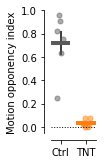

In [53]:
# Make Scatter Plot of MOI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R20D01_TNT_Ctrl_MOI, MOI_flies]
colors = ['0.35', 'C1']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'TNT'), size=10)
ax.set_ylabel('Motion opponency index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('Fig2_R20D01_50384-TNT_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [54]:
print(stats.shapiro(R20D01_TNT_Ctrl_MOI))
print(stats.shapiro(MOI_flies))
print(stats.levene(MOI_flies, R20D01_TNT_Ctrl_MOI))

(0.877304196357727, 0.25690436363220215)
(0.8530428409576416, 0.10225968807935715)
LeveneResult(statistic=5.622298751846162, pvalue=0.03532814705563781)


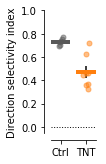

In [55]:
# Make Scatter Plot of LDir

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R20D01_TNT_Ctrl_LDir, LDir_flies]
colors = ['0.35', 'C1']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'TNT'), size=10)
ax.set_ylabel('Direction selectivity index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('Fig2_R20D01_50384-TNT_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [56]:
print(stats.shapiro(R20D01_TNT_Ctrl_LDir))
print(stats.shapiro(LDir_flies))
print(stats.levene(LDir_flies, R20D01_TNT_Ctrl_LDir))

(0.9599601030349731, 0.819433331489563)
(0.8851701021194458, 0.2108718305826187)
LeveneResult(statistic=3.913489075669312, pvalue=0.07132102025783532)


In [57]:
stats.ttest_ind(R20D01_TNT_Ctrl_MOI, MOI_flies, axis=0, equal_var=False)

Ttest_indResult(statistic=6.448585463776495, pvalue=0.0012434355589034144)

In [58]:
stats.ttest_ind(R20D01_TNT_Ctrl_LDir, LDir_flies, axis=0, equal_var=False)

Ttest_indResult(statistic=5.272816567895271, pvalue=0.0008156561324180472)